<a href="https://colab.research.google.com/github/Deepkhut/SRIP_IITGN_2022_ML/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import jax
import jax.numpy as jnp  # jax's numpy version with GPU support
from jax import random   # used to define a RNG key to control the random input in JAX

In [2]:
d=10            #define dimension 
m = jax.random.randint(jax.random.PRNGKey(0), shape=(10,10), minval=0, maxval=256)

K_0 = jax.random.randint(jax.random.PRNGKey(0), shape=(10,10), minval=0, maxval=256)
K_0
#jnp.linalg.eig(K_0)

DeviceArray([[172, 207, 168, 137, 120, 151, 249,  70, 229, 202],
             [234, 178,  96,  66, 225, 112, 201,  89, 114, 156],
             [158,   9,  42,  53, 162,  66, 107, 190, 194, 216],
             [183,  56,  59, 194, 220, 131,   7, 159, 211,  71],
             [126,  19, 175, 188, 184,  31, 255,  19, 166,  75],
             [202, 223,  32, 168, 226,  48,  89, 243,  93, 171],
             [170,  86, 198, 185,  68, 155,  49,  81, 141,  13],
             [ 41,  46,  30, 179, 196, 170, 122, 144,  62, 241],
             [ 68, 210, 206,  70, 220,  30,  76,  65,  87, 136],
             [214, 235, 183, 186,  52, 247, 115, 250,  83,  90]],            dtype=int32)

In [3]:
# Define epsilon.
epsilon = 1000

# Add small pertturbation. 
K = K_0 + epsilon*np.identity(d)
K

DeviceArray([[1172.,  207.,  168.,  137.,  120.,  151.,  249.,   70.,
               229.,  202.],
             [ 234., 1178.,   96.,   66.,  225.,  112.,  201.,   89.,
               114.,  156.],
             [ 158.,    9., 1042.,   53.,  162.,   66.,  107.,  190.,
               194.,  216.],
             [ 183.,   56.,   59., 1194.,  220.,  131.,    7.,  159.,
               211.,   71.],
             [ 126.,   19.,  175.,  188., 1184.,   31.,  255.,   19.,
               166.,   75.],
             [ 202.,  223.,   32.,  168.,  226., 1048.,   89.,  243.,
                93.,  171.],
             [ 170.,   86.,  198.,  185.,   68.,  155., 1049.,   81.,
               141.,   13.],
             [  41.,   46.,   30.,  179.,  196.,  170.,  122., 1144.,
                62.,  241.],
             [  68.,  210.,  206.,   70.,  220.,   30.,   76.,   65.,
              1087.,  136.],
             [ 214.,  235.,  183.,  186.,   52.,  247.,  115.,  250.,
                83., 1090.]], dtype=flo

In [4]:
#  Cholesky decomposition.
L = jnp.linalg.cholesky(K)
L

DeviceArray([[ 3.4234486e+01,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 6.4408736e+00,  3.3712238e+01,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 4.7612810e+00,  6.4763397e-01,  3.1920382e+01,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 4.6736498e+00,  9.1651022e-01,  1.0386429e+00,
               3.4208744e+01,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 3.5928683e+00,  2.9324303e+00,  4.6833467e+00,
               5.2517643e+00,  3.3361317e+01,  0.0000000e+00,
        

In [5]:
jnp.dot(L, np.transpose(L))

DeviceArray([[1172.      ,  220.5     ,  163.      ,  160.      ,
               123.      ,  176.5     ,  209.5     ,   55.5     ,
               148.5     ,  208.00002 ],
             [ 220.5     , 1177.9999  ,   52.5     ,   61.      ,
               122.      ,  167.5     ,  143.5     ,   67.5     ,
               162.      ,  195.5     ],
             [ 163.      ,   52.5     , 1042.      ,   56.      ,
               168.50002 ,   49.      ,  152.5     ,  110.00001 ,
               200.00002 ,  199.50002 ],
             [ 160.      ,   61.      ,   56.      , 1194.      ,
               204.      ,  149.49998 ,   96.      ,  169.      ,
               140.5     ,  128.5     ],
             [ 123.      ,  122.      ,  168.50002 ,  204.      ,
              1184.0001  ,  128.5     ,  161.5     ,  107.5     ,
               193.      ,   63.5     ],
             [ 176.5     ,  167.5     ,   49.      ,  149.49998 ,
               128.5     , 1048.      ,  121.99999 ,  206.5     ,
   

In [6]:
# Number of samples. 
n = 10
key = random.PRNGKey(42)
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)


In [7]:
x = m + jnp.dot(L, u)

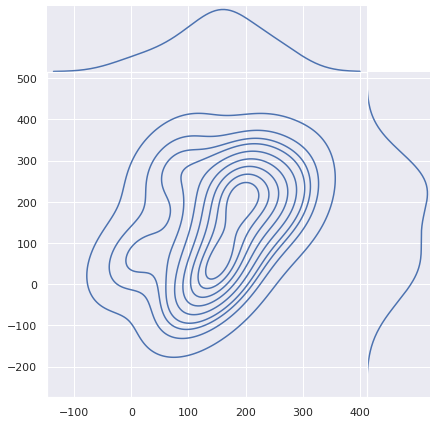

In [8]:
z = jax.random.multivariate_normal(key, mean=m, cov=K)
y = np.transpose(z)
# Plot density function.
sns.jointplot(x=y[0], y=y[1], kind="kde", space=0);